In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df=pd.read_csv('/content/Amazon Sale Report.csv',encoding= 'unicode_escape')

In [6]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [7]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                1
Sales Channel             1
ship-service-level        1
Category                  1
Size                      1
Courier Status            1
Qty                       1
currency               1754
Amount                 1754
ship-city                13
ship-state               13
ship-postal-code         13
ship-country             13
B2B                       1
fulfilled-by          18234
New                   28381
PendingS              28381
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28381 non-null  int64  
 1   Order ID            28381 non-null  object 
 2   Date                28381 non-null  object 
 3   Status              28381 non-null  object 
 4   Fulfilment          28380 non-null  object 
 5   Sales Channel       28380 non-null  object 
 6   ship-service-level  28380 non-null  object 
 7   Category            28380 non-null  object 
 8   Size                28380 non-null  object 
 9   Courier Status      28380 non-null  object 
 10  Qty                 28380 non-null  float64
 11  currency            26627 non-null  object 
 12  Amount              26627 non-null  float64
 13  ship-city           28368 non-null  object 
 14  ship-state          28368 non-null  object 
 15  ship-postal-code    28368 non-null  float64
 16  ship

In [9]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)


In [22]:
# Check for missing values in 'ship-postal-code' column
print(df['ship-postal-code'].isnull().sum())

# Identify non-finite values in 'ship-postal-code' column
non_finite_codes = df['ship-postal-code'].isnull() | np.isinf(df['ship-postal-code'])
print(df[non_finite_codes])

# Handle missing or non-finite values in 'ship-postal-code' column
# Option 1: Drop rows with non-finite values
df = df.dropna(subset=['ship-postal-code'])
df = df[~np.isinf(df['ship-postal-code'])]

# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')



0
Empty DataFrame
Columns: [index, Order ID, Date, Status, Fulfilment, Sales Channel, ship-service-level, Category, Size, Courier Status, Qty, currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, B2B, fulfilled-by]
Index: []


In [21]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [23]:
df['Date']=pd.to_datetime (df['Date'])

<ipython-input-23-5c207e96e7cb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime (df['Date'])


In [24]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [25]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,28374,407-0541398-6322729,2022-04-13,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1.0,INR,579.00,BARAMATI,MAHARASHTRA,413133,IN,False,Easy Ship
28376,28375,171-0582346-9241149,2022-04-13,Shipped,Amazon,Amazon.in,Expedited,Trousers,L,Shipped,1.0,INR,259.00,KALYAN,MAHARASHTRA,421301,IN,False,NaN
28377,28376,402-0562630-1985901,2022-04-13,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XL,Shipped,1.0,INR,435.00,RANIPETTAI,TAMIL NADU,632404,IN,False,Easy Ship
28378,28377,407-8525204-2346732,2022-04-13,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1.0,INR,342.00,Jaipur,Rajasthan,302021,IN,False,NaN


In [26]:
#describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,28368.000000,28368,28368.000000,26615.000000,28368.000000
mean,14187.905986,2022-04-21 15:46:48.121827584,0.896538,619.549611,462932.194374
min,0.000000,2022-04-13 00:00:00,0.000000,0.000000,110001.000000
25%,7094.750000,2022-04-17 00:00:00,1.000000,432.000000,380006.000000
50%,14189.500000,2022-04-22 00:00:00,1.000000,568.000000,500019.000000
75%,21284.250000,2022-04-26 00:00:00,1.000000,759.000000,600028.000000
max,28378.000000,2022-04-30 00:00:00,15.000000,5495.000000,989898.000000
std,8194.476547,NaN,0.338968,270.168630,194912.101592


In [27]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,28368,28368,28368,28368,28368,28368,28368,28368,26615,28368,28368,28368,28368,10144
unique,26327,8,2,2,2,8,11,4,1,3680,52,1,2,1
top,408-3317403-1729937,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,10,15871,18224,28329,17971,11774,5099,24173,26615,2266,4831,28368,28126,10144


In [28]:
#use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,28368.000000,26615.000000
mean,0.896538,619.549611
std,0.338968,270.168630
min,0.000000,0.000000
25%,1.000000,432.000000
50%,1.000000,568.000000
75%,1.000000,759.000000
max,15.000000,5495.000000


# Exploratory Data Analysis

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

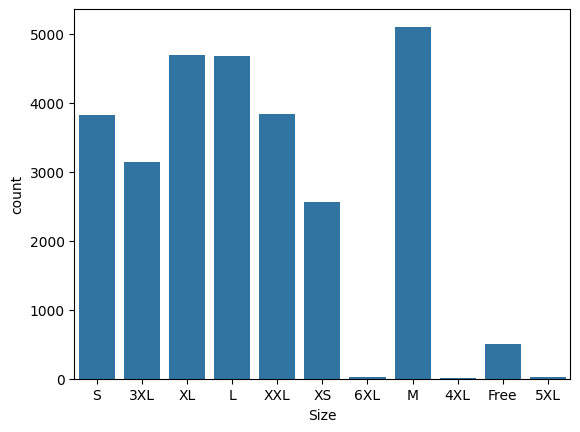

In [30]:
ax=sns.countplot(x='Size' ,data=df)

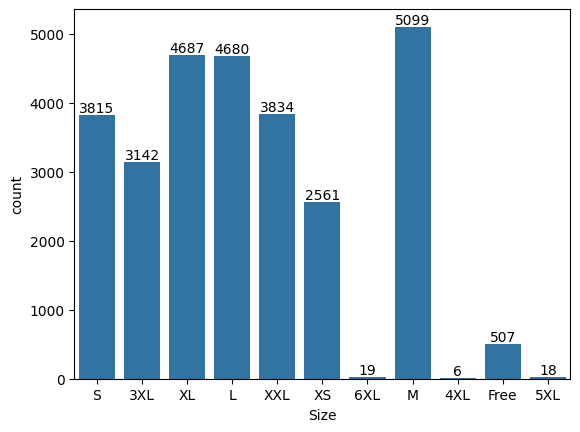

In [31]:
ax=sns.countplot(x='Size' ,data=df)

for bars in ax.containers:
    ax.bar_label(bars)

Note: From above Graph you can see that most of the people buys M-Size

## Group By
The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [32]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,4548.0
5,L,4210.0
8,XL,4180.0
10,XXL,3470.0
7,S,3418.0
0,3XL,2867.0
9,XS,2225.0
4,Free,476.0
2,5XL,17.0
3,6XL,16.0


<Axes: xlabel='Size', ylabel='Qty'>

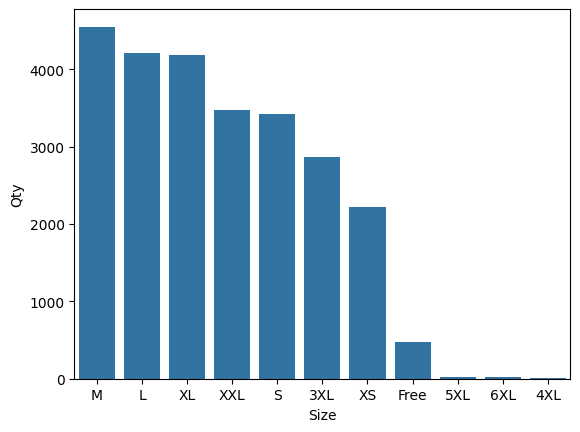

In [33]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)

Note: From above Graph you can see that most of the Qty buys M-Size in the sales
## Courier Status

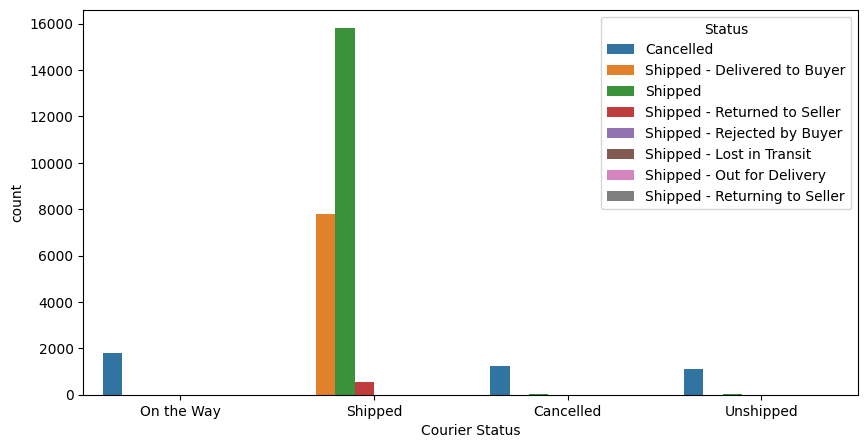

In [34]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

Note: From above Graph the majority of the orders are shipped through the courier.

<Axes: >

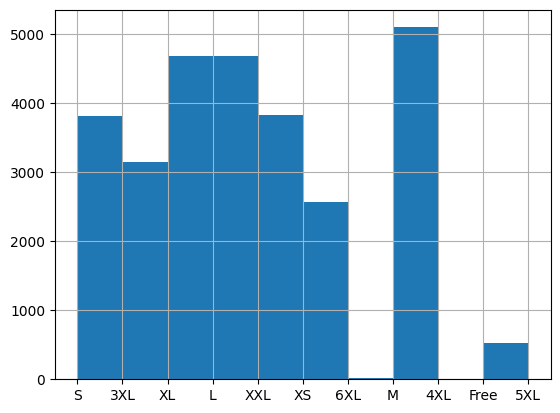

In [35]:
#histogram
df['Size'].hist()

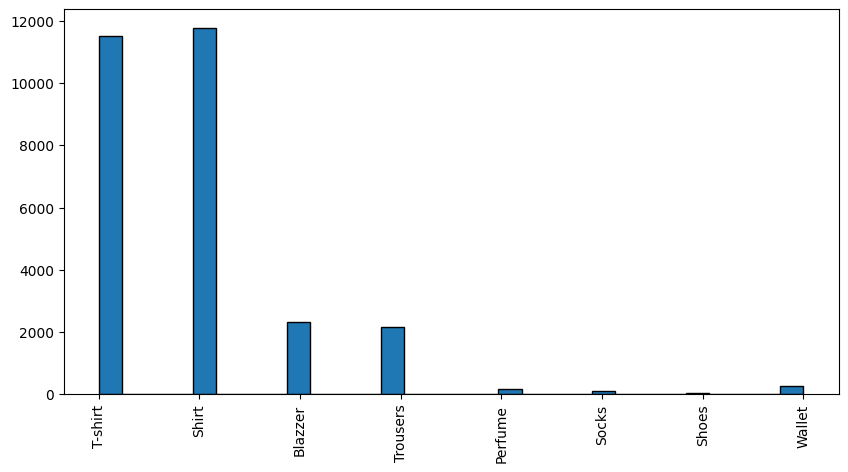

In [36]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

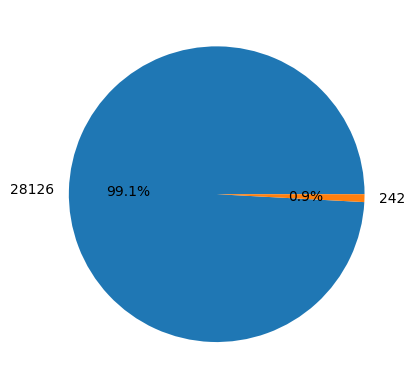

In [37]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

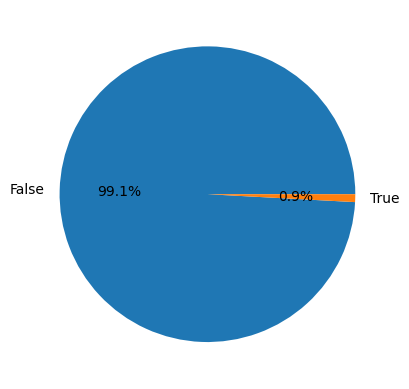

In [38]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

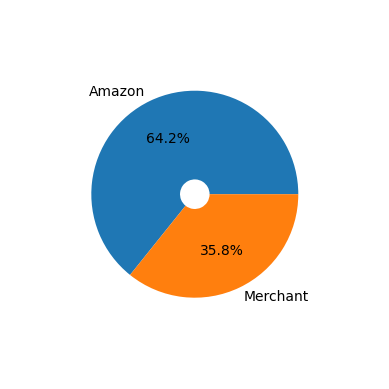

In [39]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

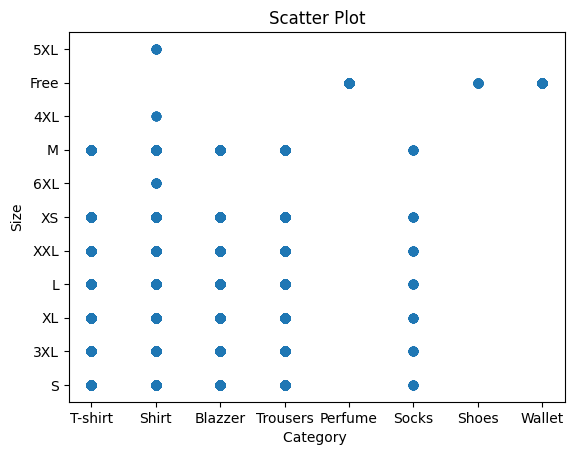

In [40]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

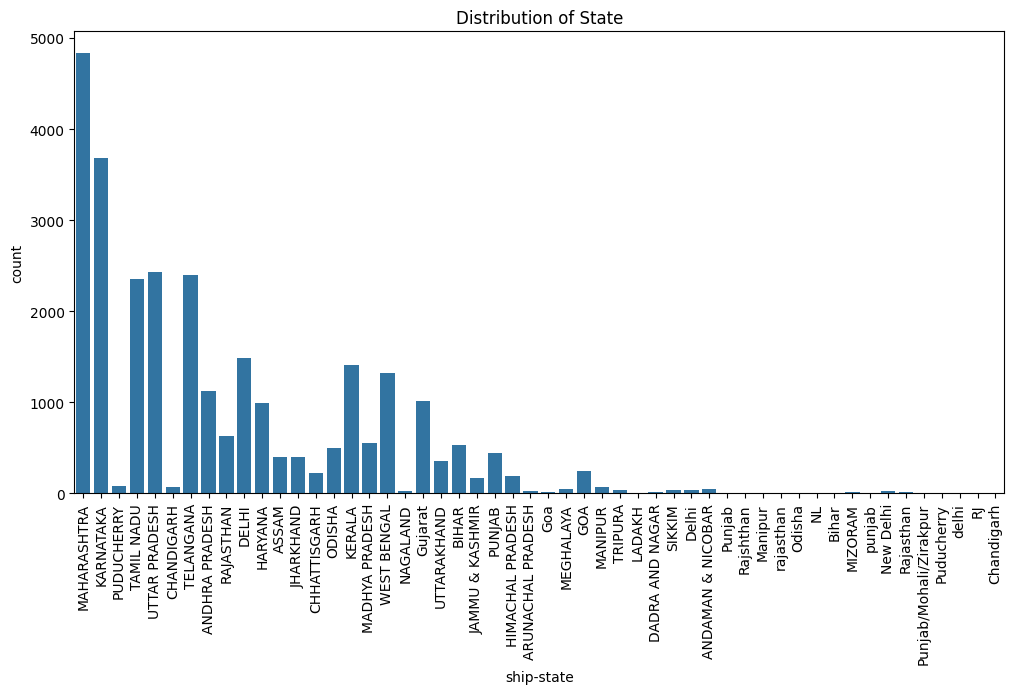

In [41]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

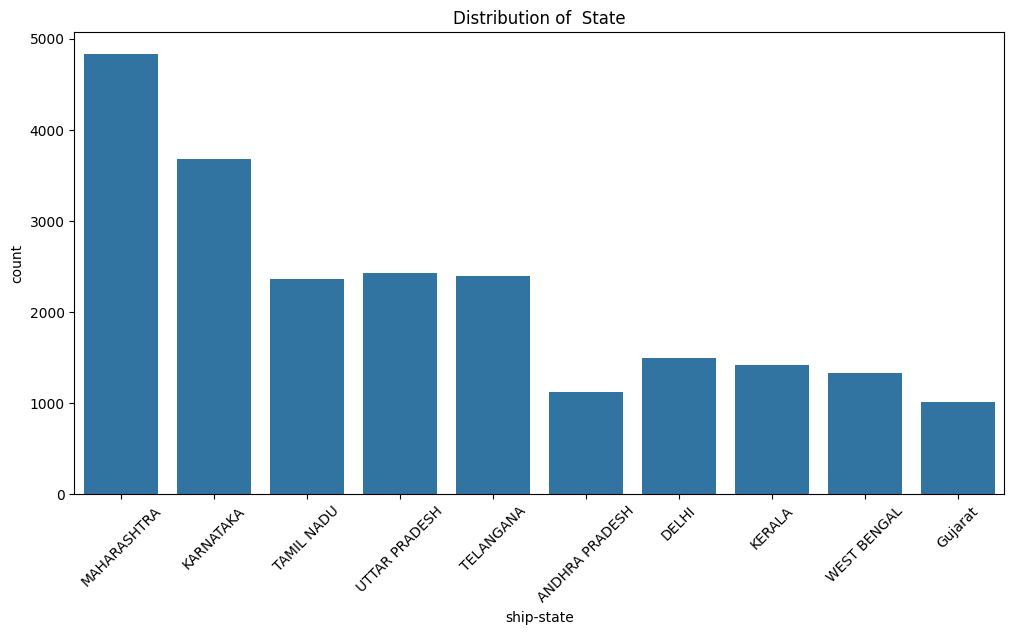

In [42]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

Note: From above Graph you can see that most of the buyers are Maharashtra state
### Conclusion
The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.